# Rat cortex example

author: steeve.laquitaine@epfl.ch

* metadata: https://billkarsh.github.io/SpikeGLX/Support/Metadata_3A.html

* questions: 
    * are all the sites in the cortex? if not which one are in the cortex?
    * do you have site-layer information?

### Data description

download from https://www.dropbox.com/scl/fo/l9hqs24wgyu00ow18mkb0/h?dl=0&rlkey=tisqa51lawlqocj5sv52zjjzk

Claudia provided some sample Neuropixels data from rat cortex. It isn't an exact match to my simulation, because it isn't aligned to the cortical columns, but should still provide a useful reference for the typical waveforms.

I've put the data on Dropbox:
https://www.dropbox.com/scl/fo/l9hqs24wgyu00ow18mkb0/h?rlkey=tisqa51lawlqocj5sv52zjjzk&dl=0

Claudia's paper using this data (along with many other recordings):https://www.biorxiv.org/content/10.1101/2023.01.16.524214v1

This is data from a 3A probe, which is a precursor to the NP 1.0 probe. The site geometry is the same. The data is recorded from the **middle of the probe**, so the channels in the binary file are not in strict geometry order -- the text file provides the XY coordinates for each channel in the file.

A good way to get started looking at the data is to use the SpikeGLX file viewer (you can download the software here: https://billkarsh.github.io/SpikeGLX/). There's a lot of information about the recording in the metadata files -- see here for a description of the metadata fields (https://billkarsh.github.io/SpikeGLX/Support/Metadata_3A.html). 

There's some basic code to read the binaries here:https://github.com/jenniferColonell/SpikeGLX_Datafile_Tools

If it's useful to have a zoom call to help get you started with the data, I'm happy to do that!

In [ ]:
import spikeinterface as si
import spikeinterface.extractors as se
from matplotlib import pyplot as plt
from probeinterface.plotting import plot_probe
import numpy as np 

data_path = "/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/raw/vivo_rat_cortex_colonell"

In [24]:
# load recording
# recording = se.read_spikeglx(data_path, stream_id="imec.lf")  # stream with a 2.5 Khz, 600 secs lfp trace
Recording = se.read_spikeglx(data_path, stream_id="imec.ap")    # stream with a 30 KHz 600 secs trace

In [5]:
# check probe
try:
    probe = Recording.get_probe()
    print("A probe is attached.")
except:
    print("No probe was found.")

A probe is attached.


### Probe contact coordinates, ids, channel mapping

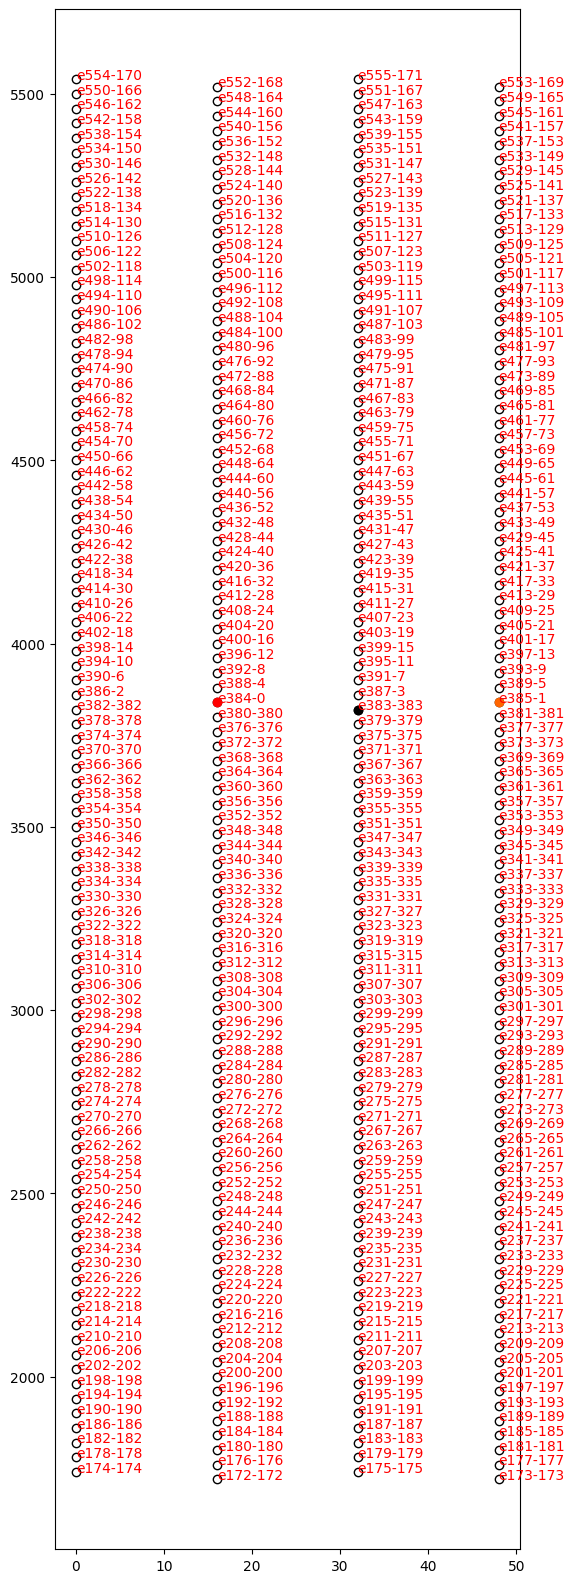

In [45]:
contact_coord = probe.contact_positions
contact_ids = probe.contact_ids

# plot file contact with ids 
fig, ax = plt.subplots(1,1, figsize=(6,20))
ax.plot(contact_coord[:,0], contact_coord[:,1], "o", markerfacecolor="w", color="k");
for ix in range(len(contact_ids)):
    if ix % 1 == 0:
        ax.text(
            contact_coord[ix, 0],
            contact_coord[ix, 1],
            "%s" % (str(contact_ids[ix])+"-"+str(probe.device_channel_indices[ix])),
            size=10,
            zorder=100,
            color="r",
        )

# tag first coordinate (device channel 0)
plt.plot(contact_coord[0, 0], contact_coord[0, 1], "ro");

# tag second coordinate (device channel 1)
plt.plot(contact_coord[1, 0], contact_coord[1, 1], "o", color=(1,.4,0));

# tag last coordinate (device channel 383)
plt.plot(contact_coord[-1, 0], contact_coord[-1, 1], "ko");

/tmp/ipykernel_284647/2327077282.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.subplots(1,1,figsize=(15,1))


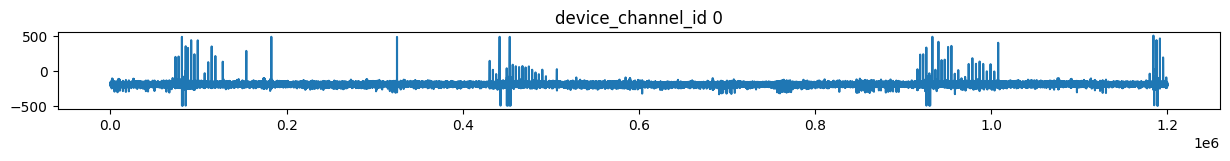

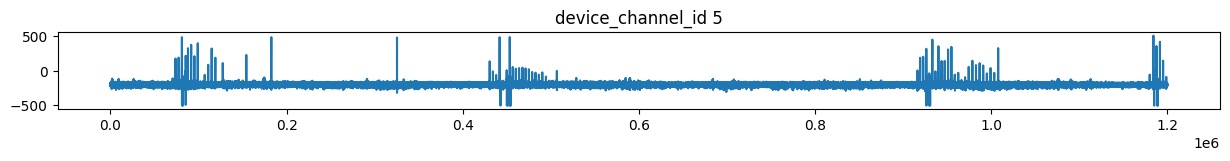

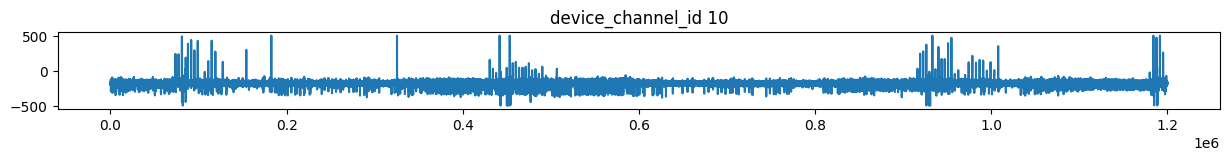

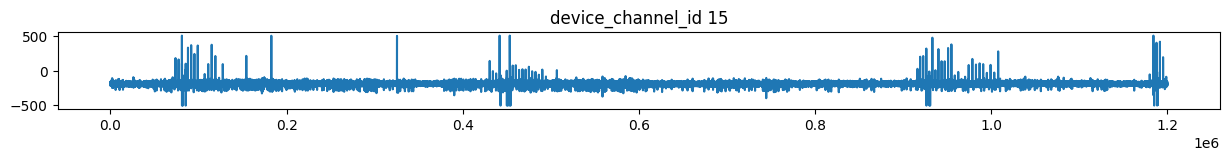

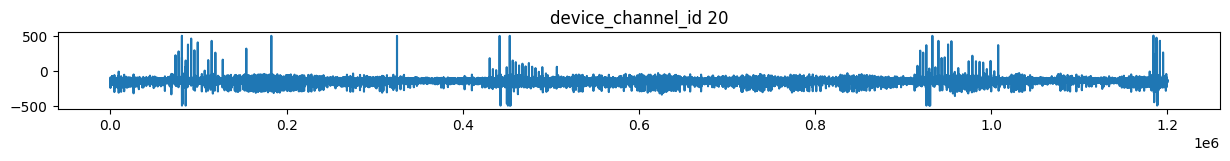

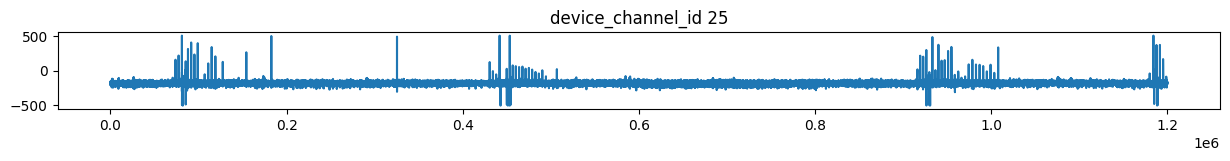

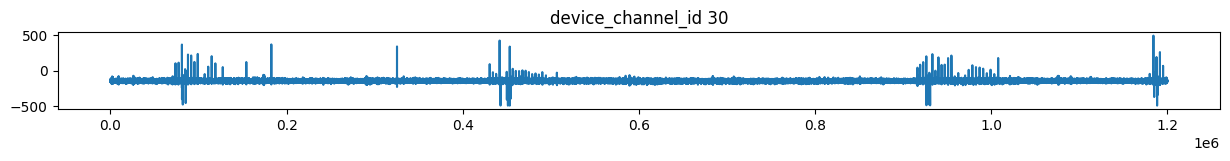

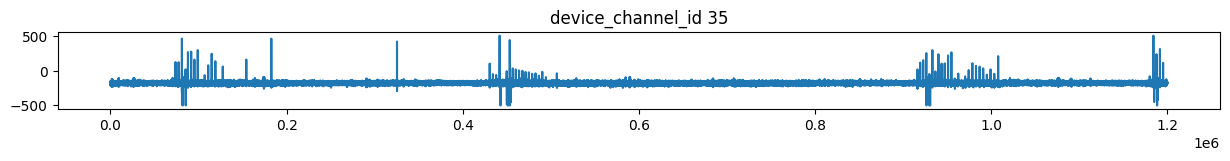

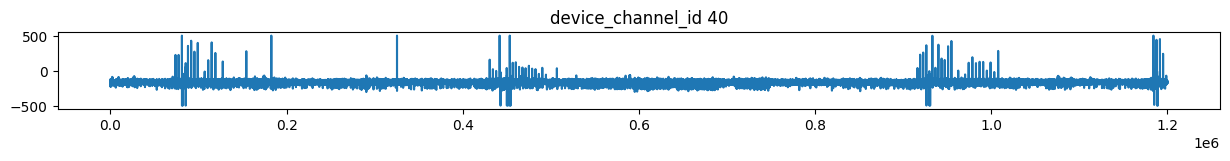

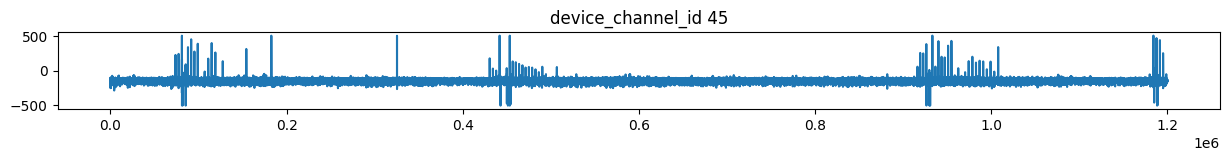

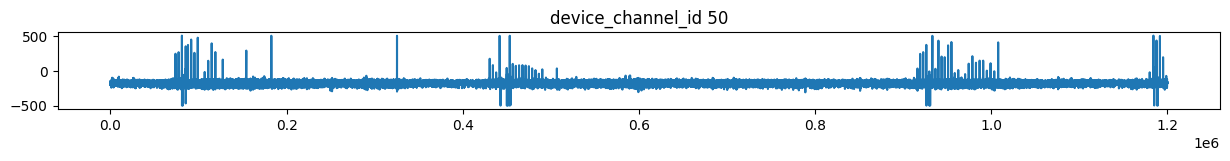

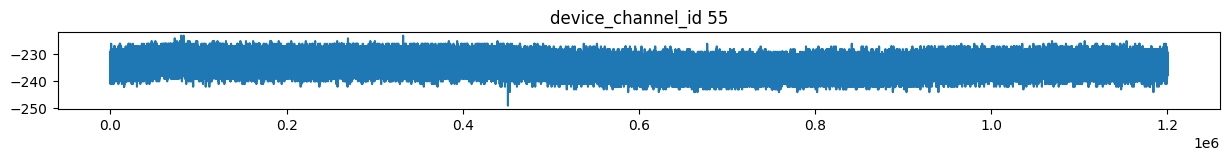

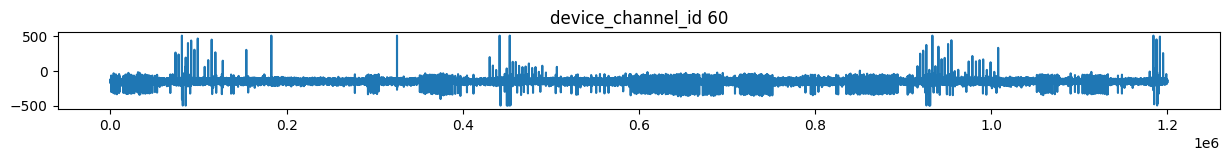

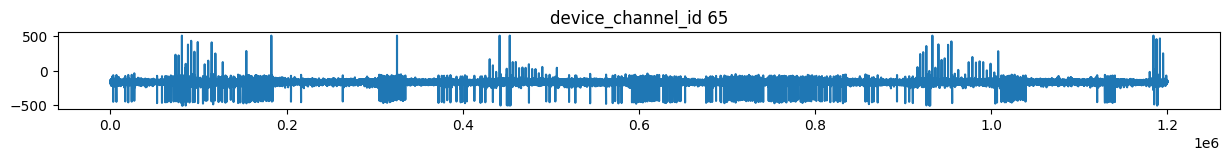

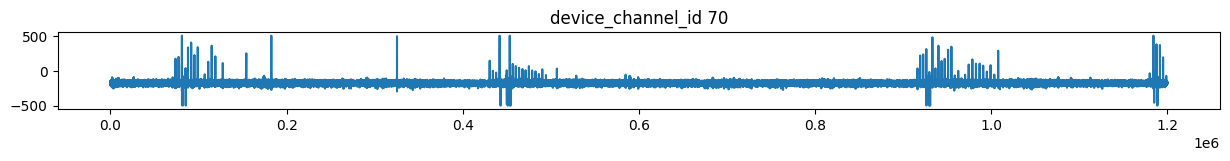

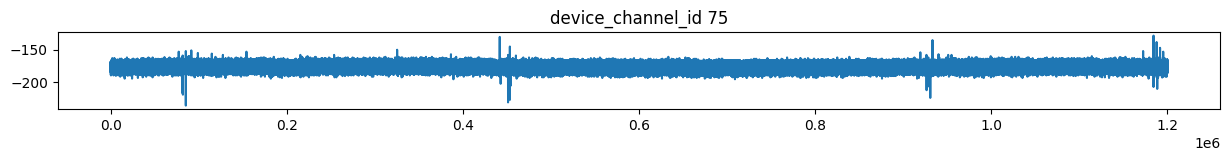

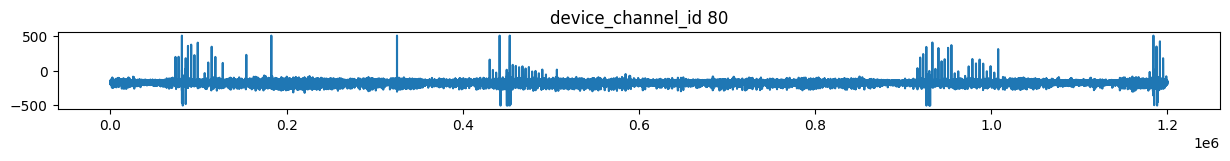

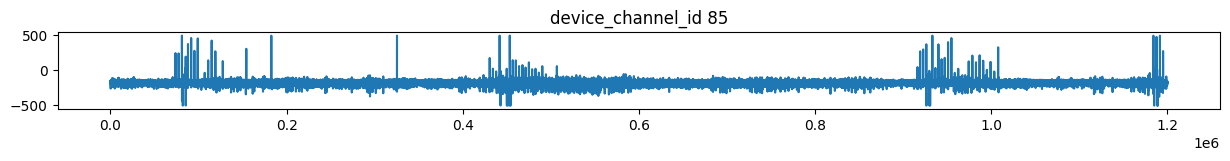

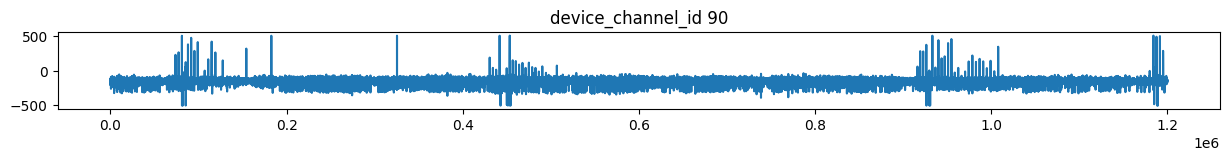

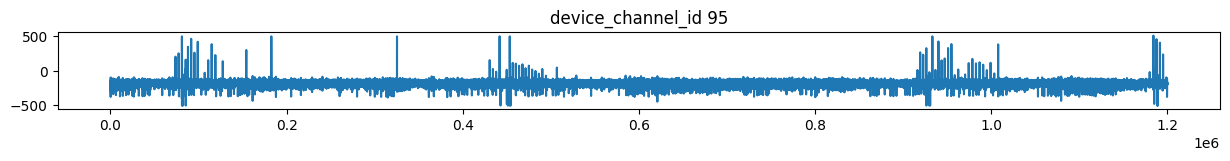

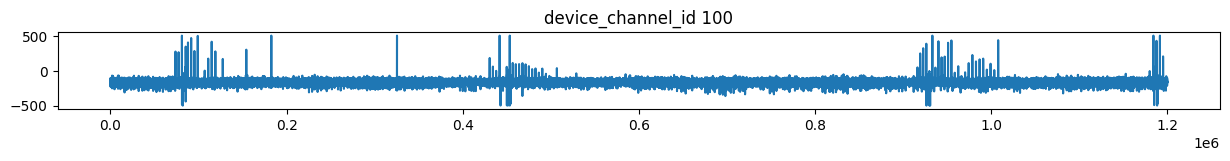

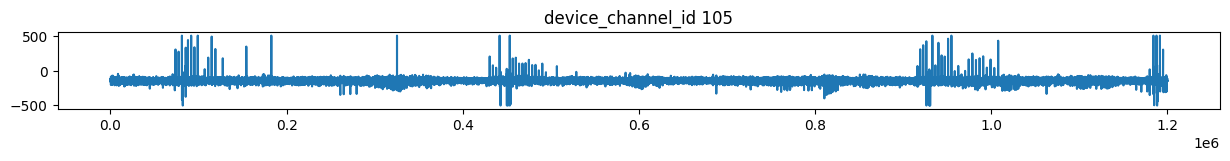

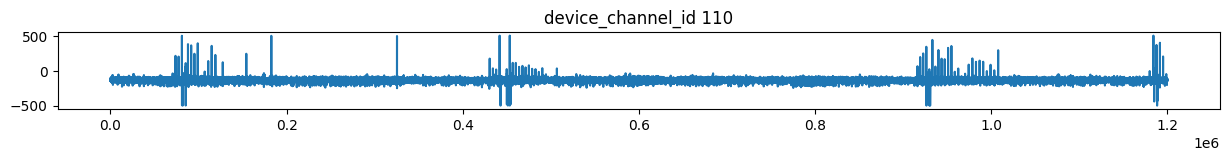

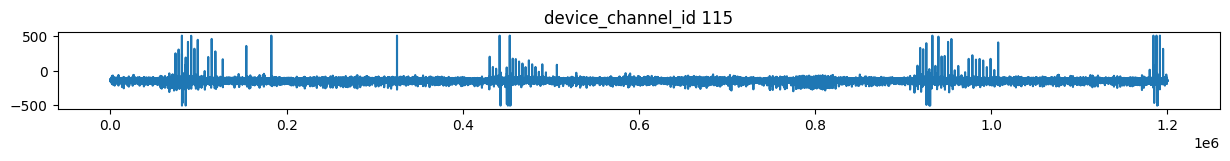

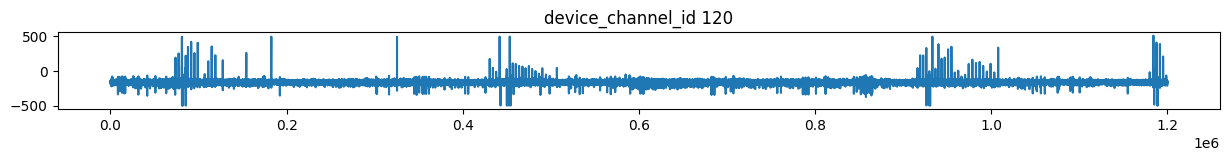

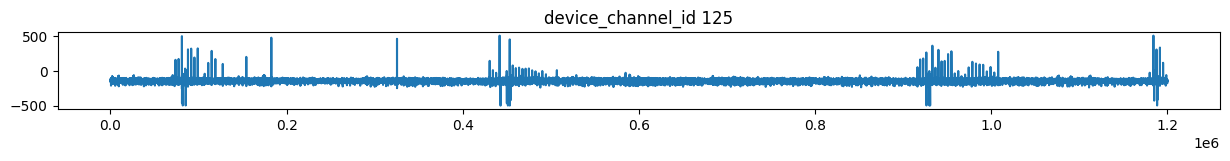

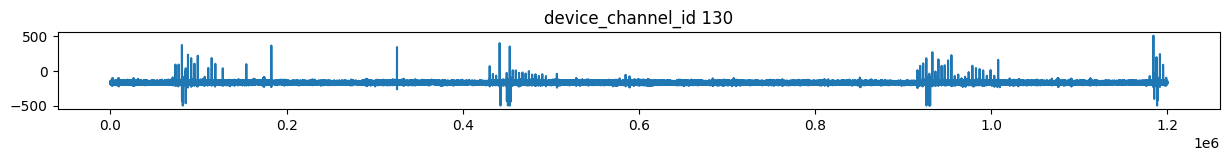

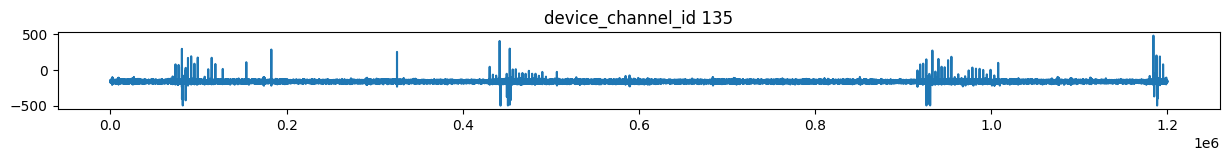

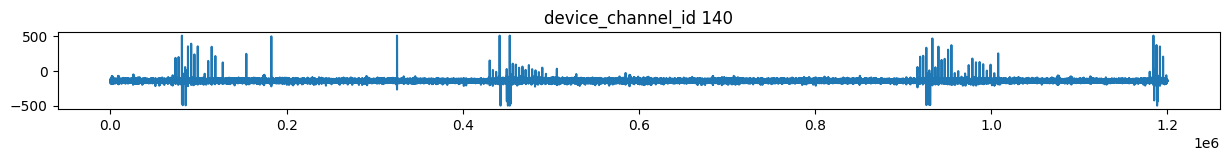

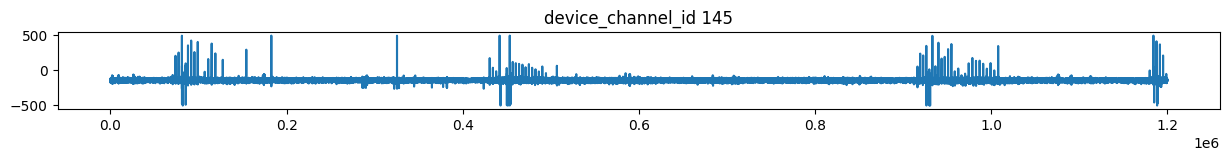

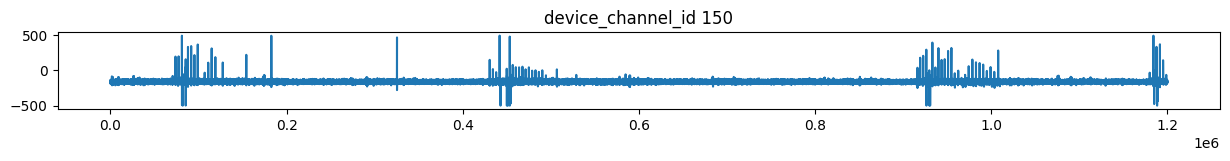

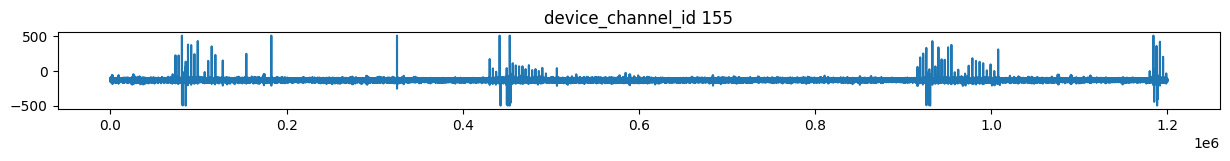

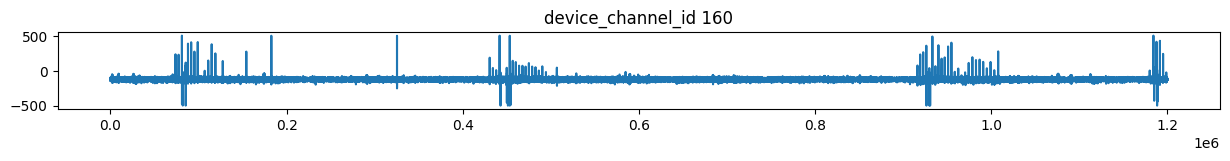

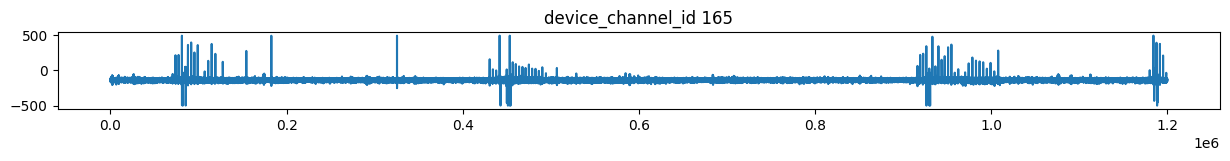

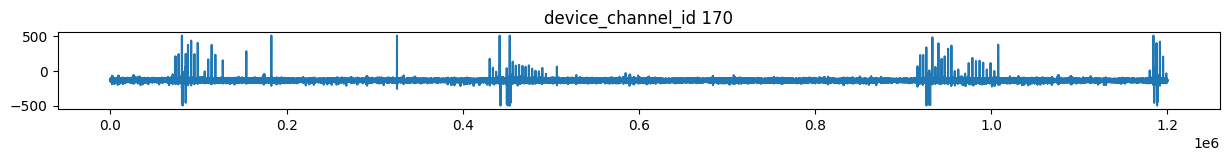

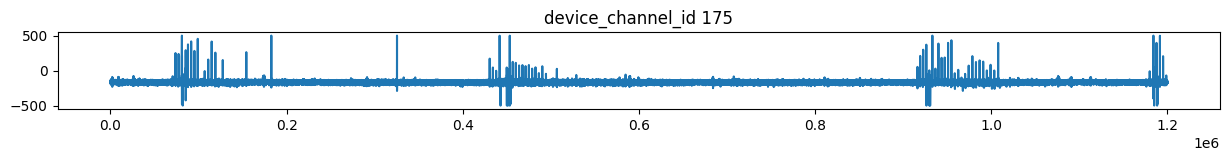

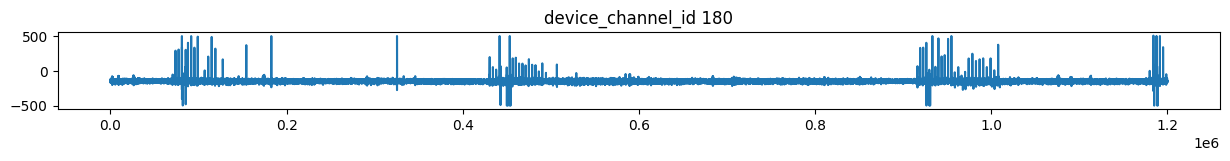

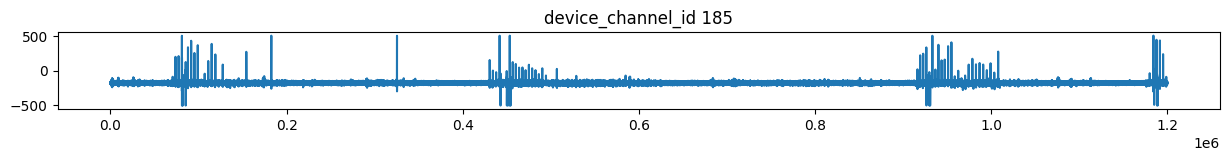

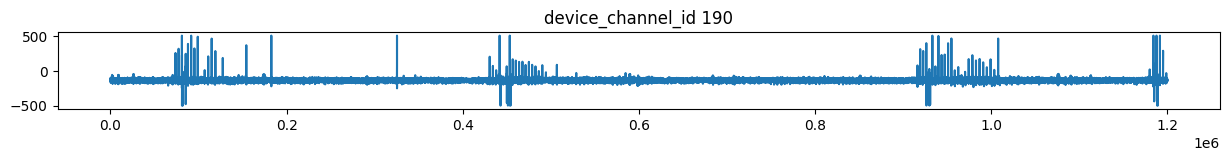

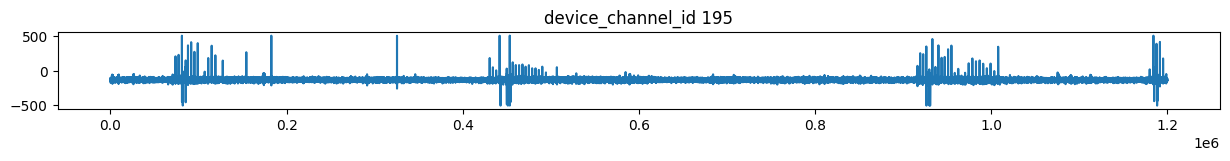

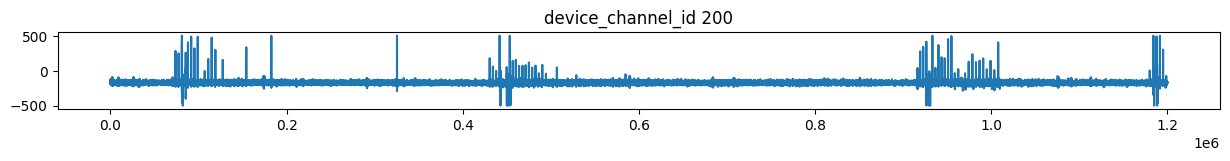

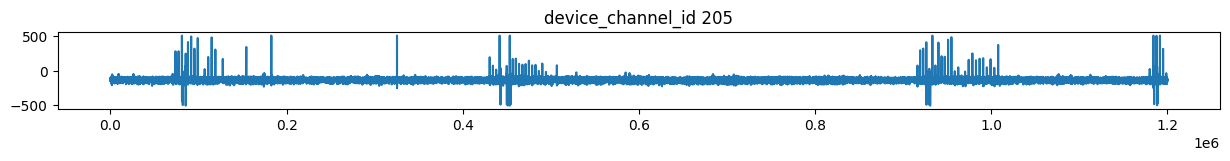

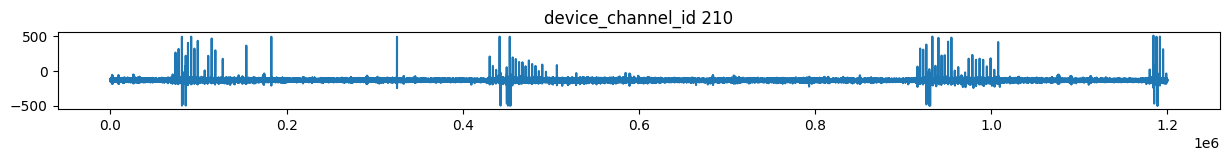

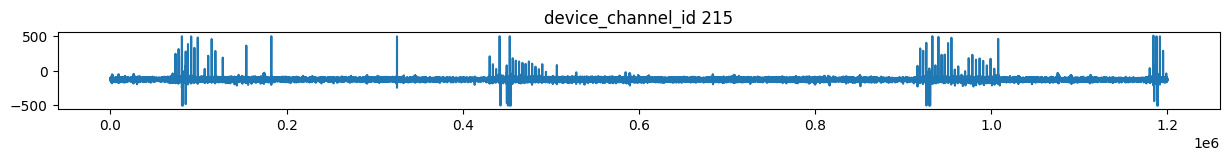

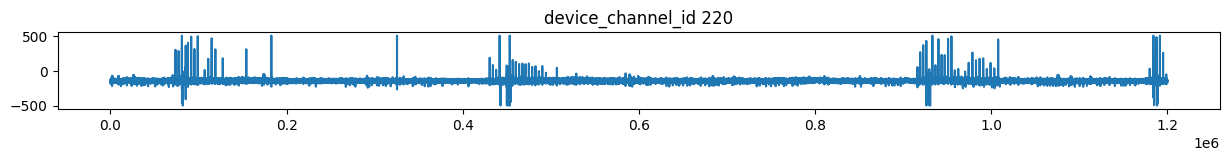

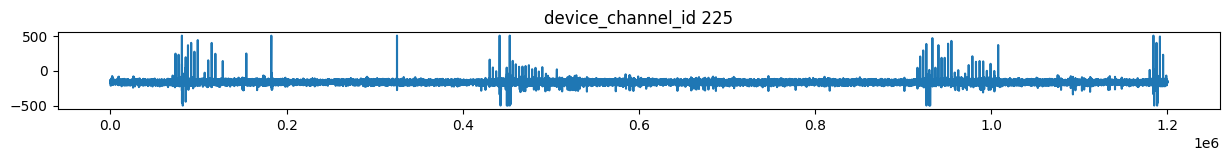

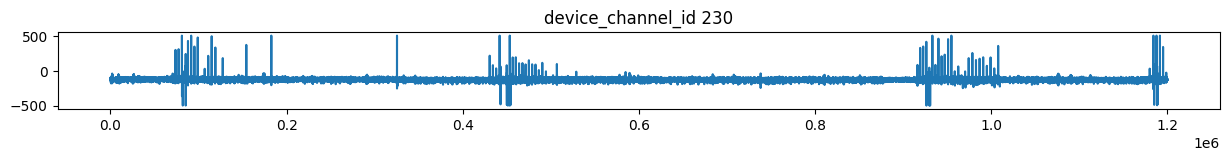

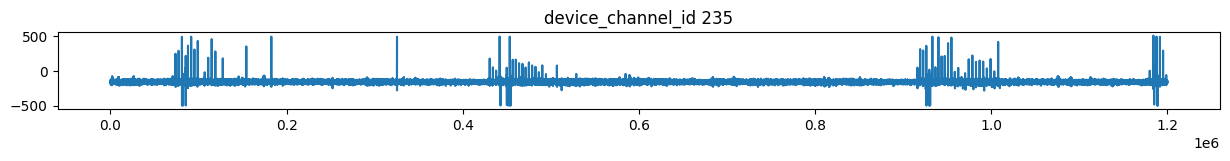

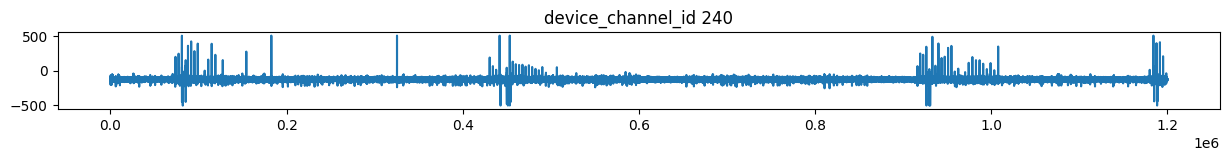

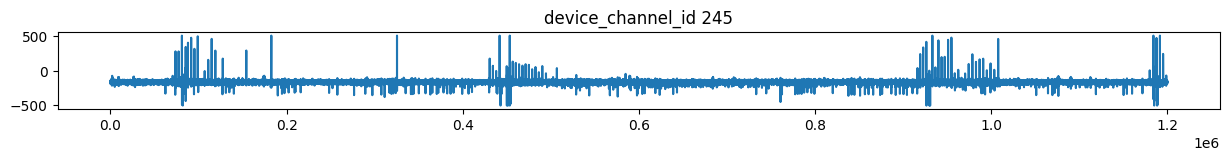

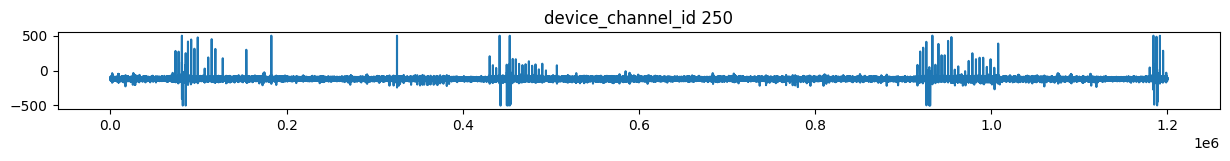

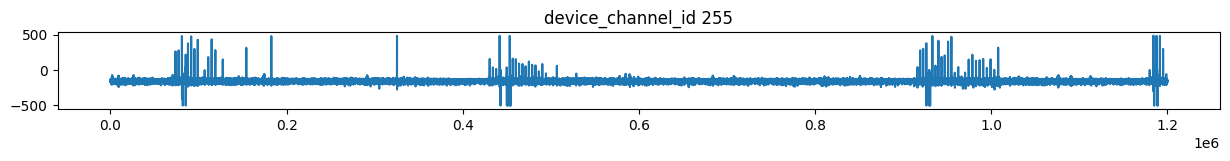

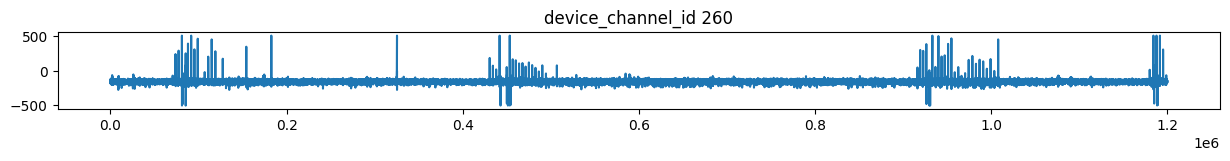

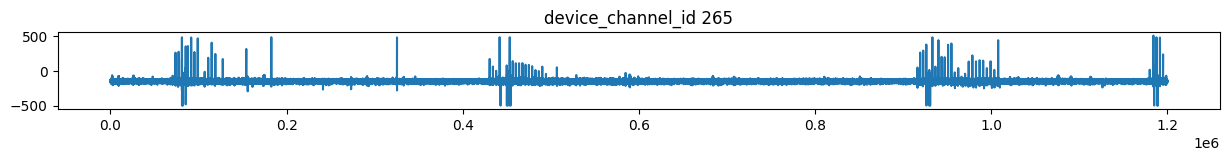

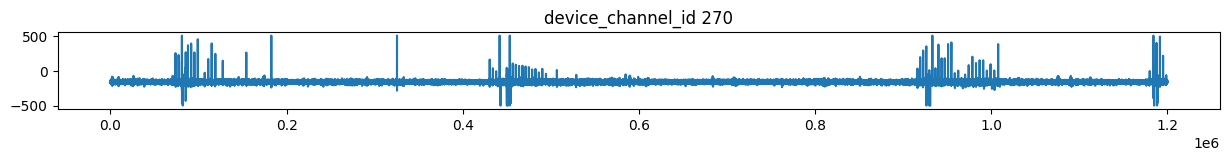

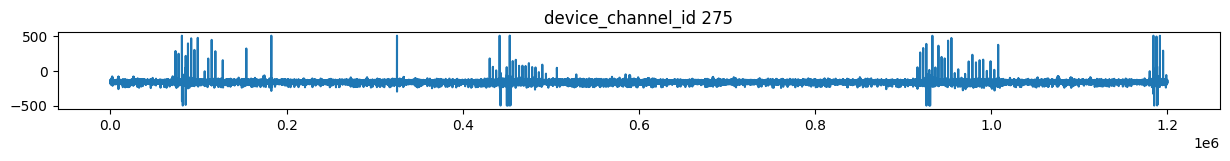

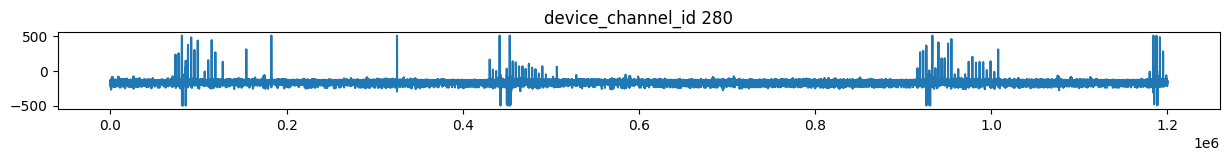

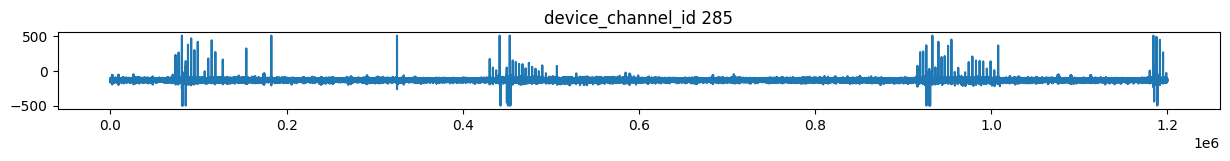

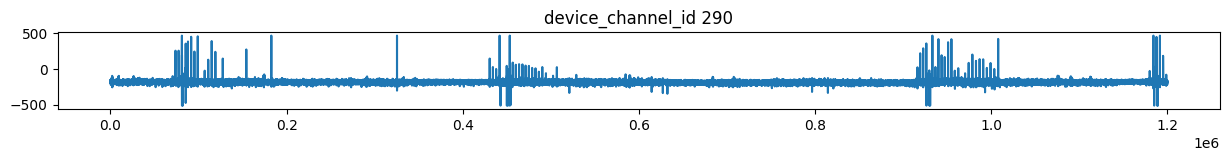

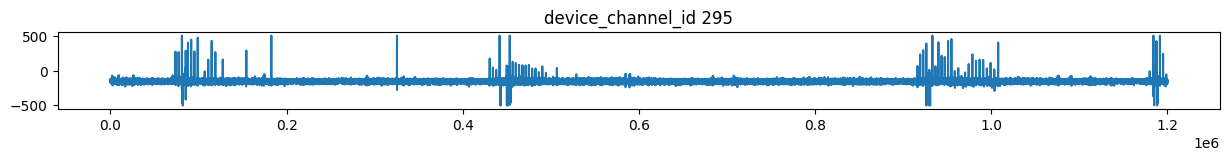

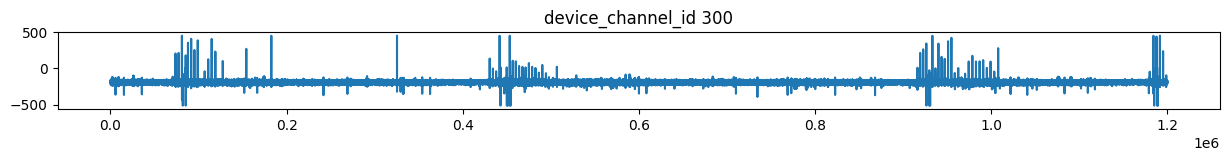

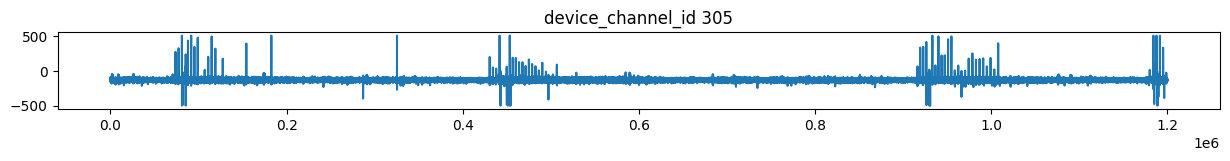

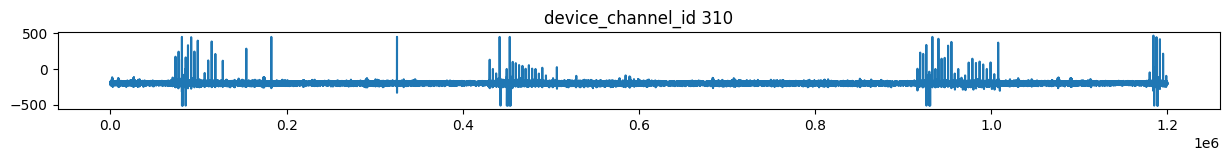

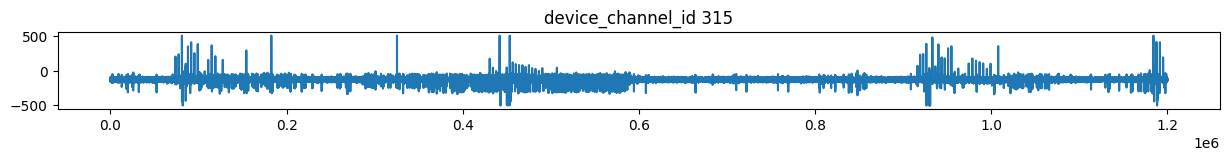

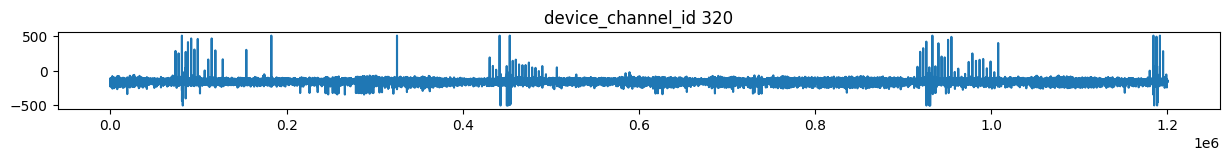

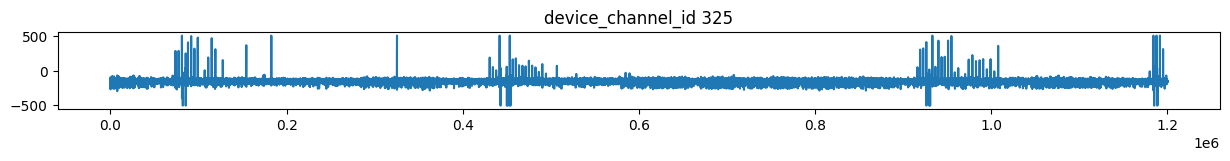

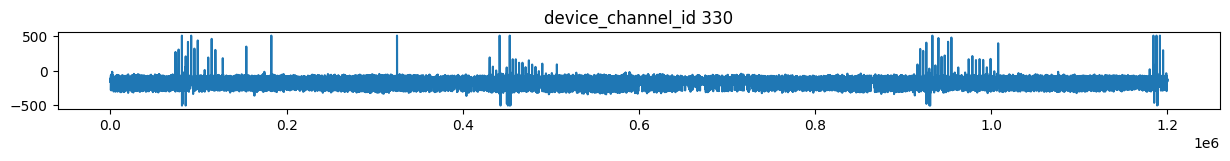

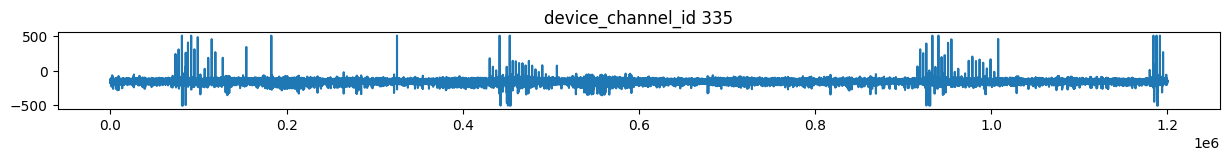

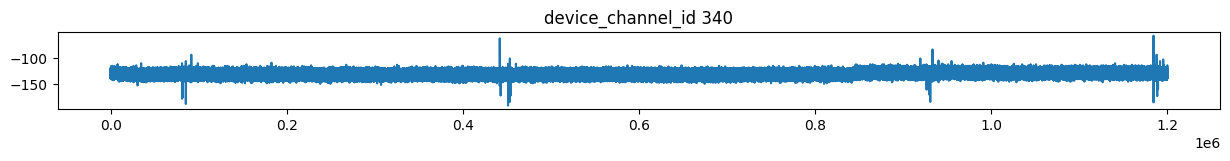

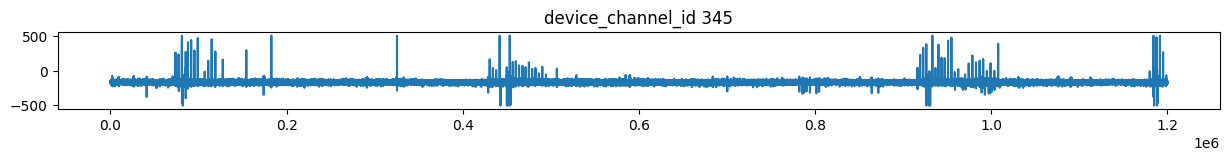

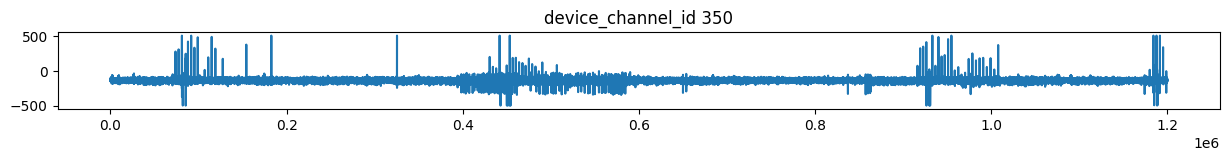

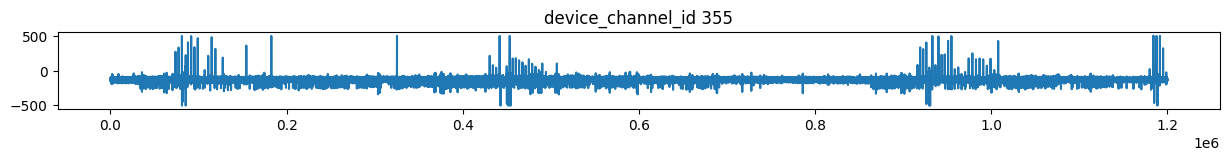

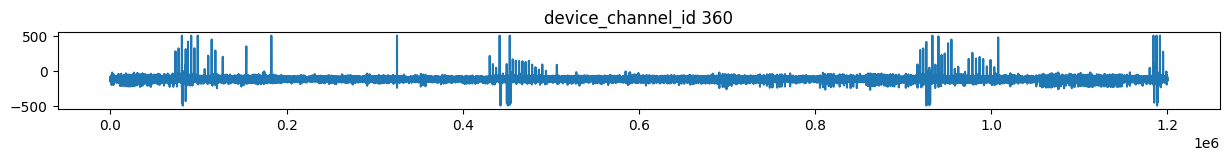

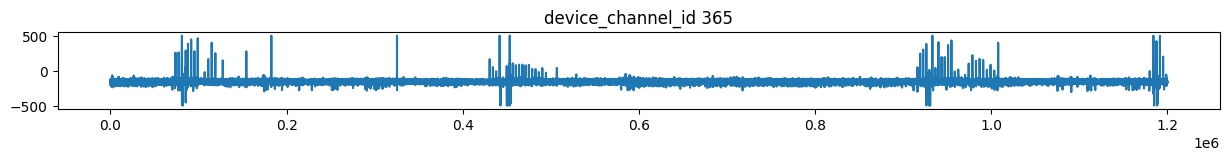

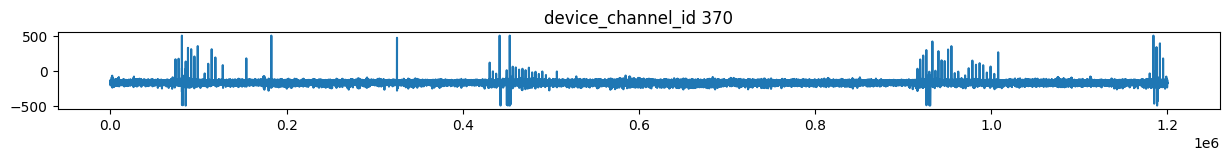

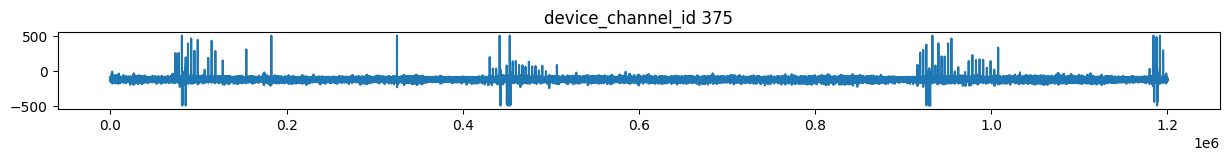

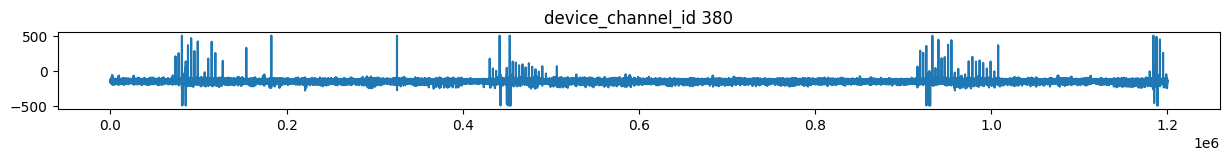

In [46]:
traces = Recording.get_traces()

SAMPFREQ = 30000

window = np.arange(40*SAMPFREQ, 2*40*SAMPFREQ, 1)

# plot
for ix in range(384):
    if ix % 5 == 0:
        plt.subplots(1,1, figsize=(15,1))
        plt.plot(traces[window, ix])
        plt.title(f"device_channel_id {probe.device_channel_indices[ix]}")

## References

https://spikeinterface.readthedocs.io/en/latest/api.html

https://www.janelia.org/open-science/spikeglx-neurophysiology-probe-acquisition-software